In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import glob
import statistics

In [2]:
df = pd.read_csv("./datasets/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [3]:
# checking for null values
df.isnull()
# check if any value is missing in the dfset'
df.isna()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35060,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35061,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35062,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df['Date']=pd.to_datetime(df[['year', 'month', 'day']])
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,2017-02-28
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,2017-02-28
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,2017-02-28
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,2017-02-28


In [5]:
import calendar
def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

In [6]:
df['DayNames'] = df['Date'].apply(lambda x: findDay(x))
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date,DayNames
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday


df Exploration and Analysis

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   year      35064 non-null  int64         
 2   month     35064 non-null  int64         
 3   day       35064 non-null  int64         
 4   hour      35064 non-null  int64         
 5   PM2.5     34139 non-null  float64       
 6   PM10      34346 non-null  float64       
 7   SO2       34129 non-null  float64       
 8   NO2       34041 non-null  float64       
 9   CO        33288 non-null  float64       
 10  O3        33345 non-null  float64       
 11  TEMP      35044 non-null  float64       
 12  PRES      35044 non-null  float64       
 13  DEWP      35044 non-null  float64       
 14  RAIN      35044 non-null  float64       
 15  wd        34983 non-null  object        
 16  WSPM      35050 non-null  float64       
 17  station   35

In [8]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date,DayNames
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,2017-02-28,Tuesday
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,2017-02-28,Tuesday
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,2017-02-28,Tuesday
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,2017-02-28,Tuesday


In [9]:
df.drop(["year", "month", "day", "hour", "Date", "DayNames"], axis=1).describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


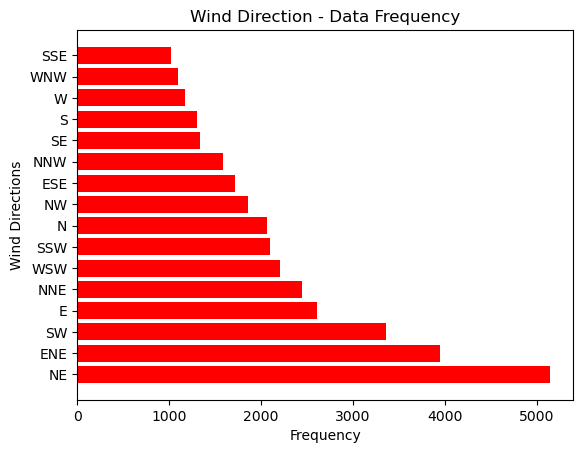

Number of Wind Direction 
wd
NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64


In [10]:
plt.figure()
plt.barh(df["wd"].value_counts().index, df["wd"].value_counts(), color = "r")
plt.xlabel("Frequency")
plt.ylabel("Wind Directions")
plt.title("Wind Direction - Data Frequency")
plt.show()
print(f"Number of Wind Direction \n{df['wd'].value_counts()}")

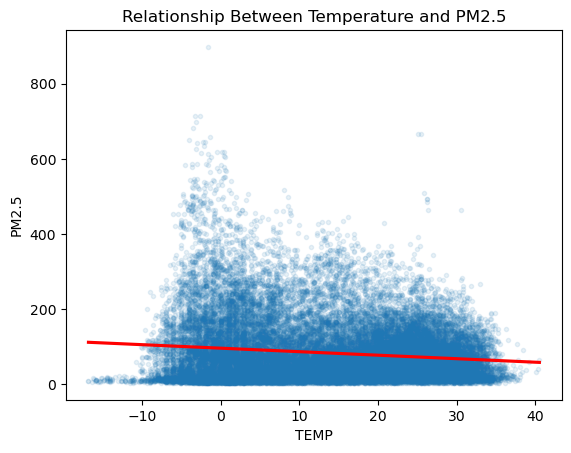

In [11]:
sns.regplot(x='TEMP', y='PM2.5', data=df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Temperature and PM2.5')
plt.show()

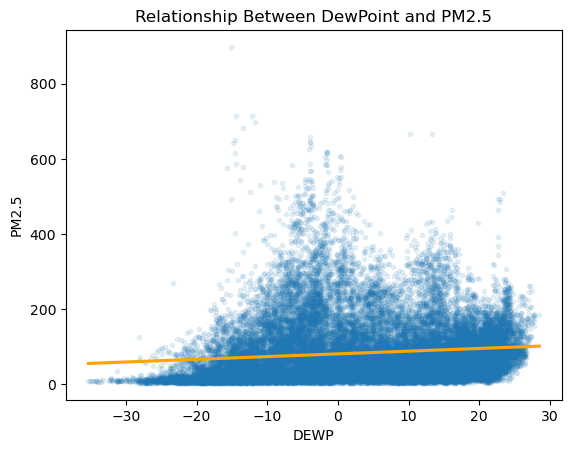

In [12]:
sns.regplot(x='DEWP', y='PM2.5', data=df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"orange"})
plt.title('Relationship Between DewPoint and PM2.5')
plt.show()

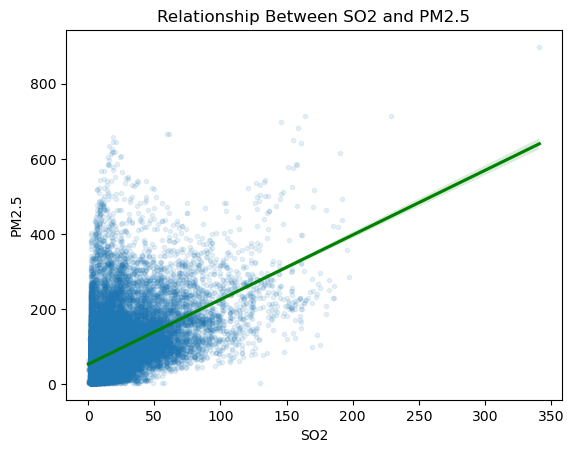

In [13]:
sns.regplot(x='SO2', y='PM2.5', data=df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"green"})
plt.title('Relationship Between SO2 and PM2.5')
plt.show()

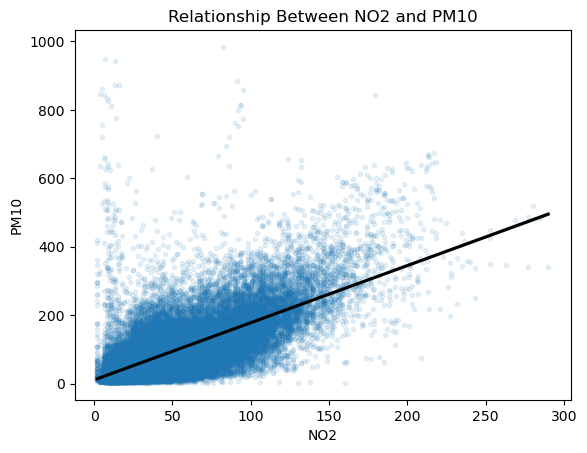

In [14]:
sns.regplot(x='NO2', y='PM10', data=df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"black"})
plt.title('Relationship Between NO2 and PM10')
plt.show()

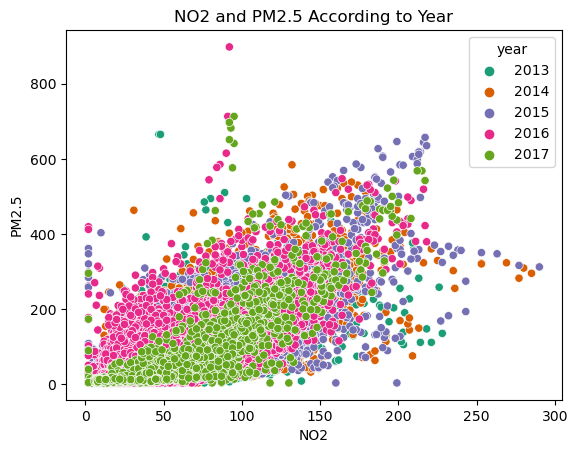

In [15]:
sns.scatterplot(x='NO2', y='PM2.5', hue='year', data=df, palette = "Dark2")
plt.title('NO2 and PM2.5 According to Year')
plt.show()

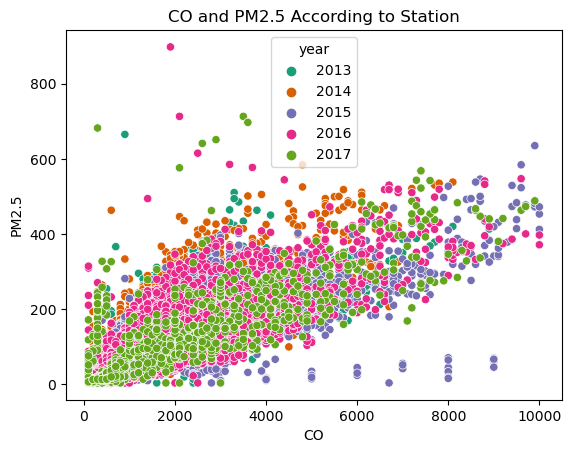

In [18]:
sns.scatterplot(x='CO', y='PM2.5', hue='year', data=df, palette = "Dark2")
plt.title('CO and PM2.5 According to Station')
plt.show()

c:\Users\kpk16\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


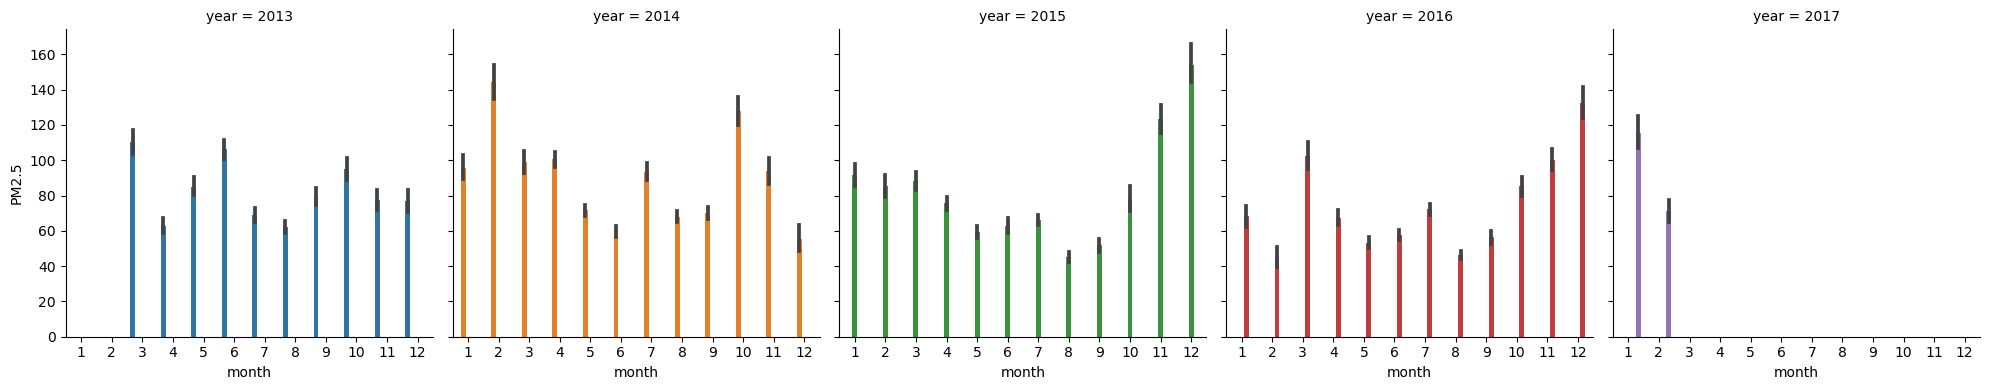

In [22]:
sns.catplot(x="month", y="PM2.5",  hue="year", col="year",
                data=df, kind="bar", height=4)
plt.show()

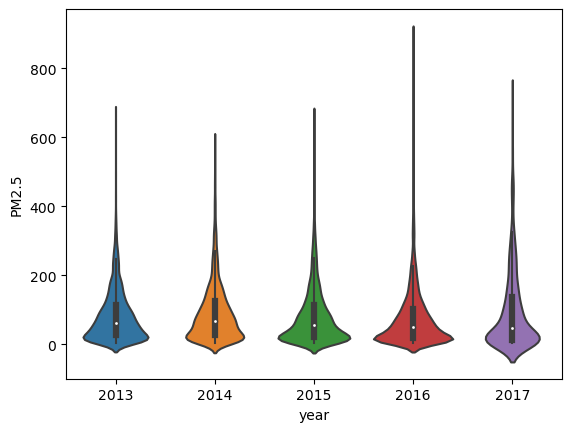

In [26]:
sns.violinplot(x="year", y="PM2.5", data=df)
plt.show()

AnnuaL Analysis

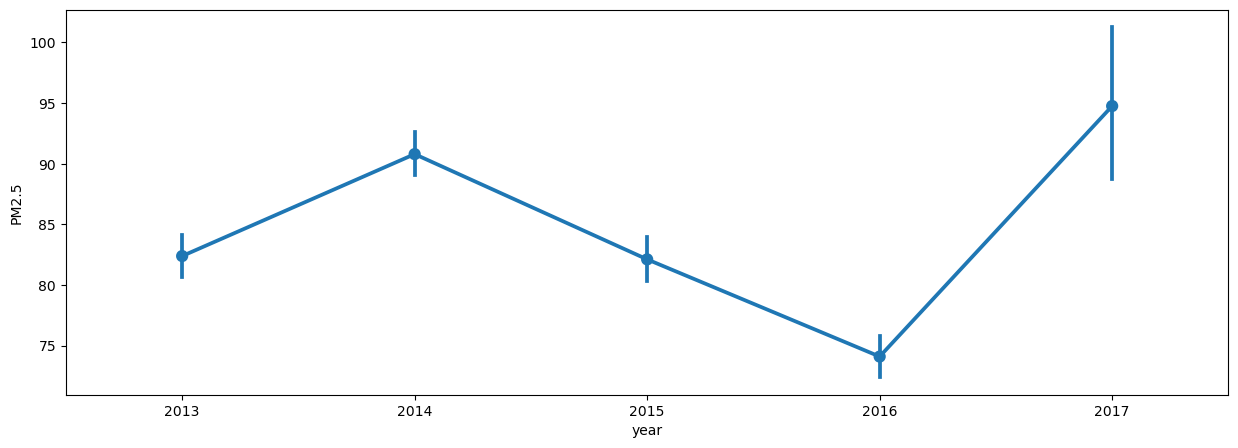

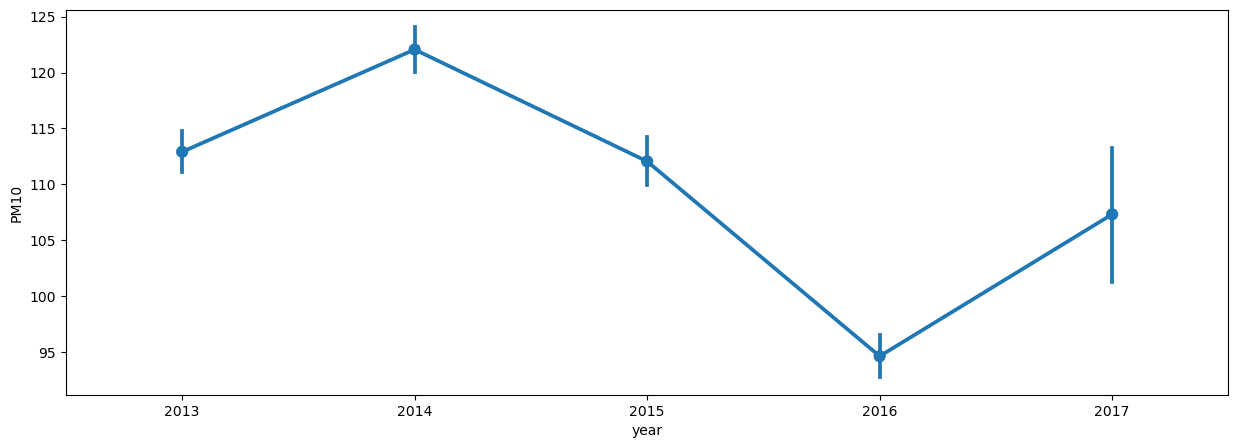

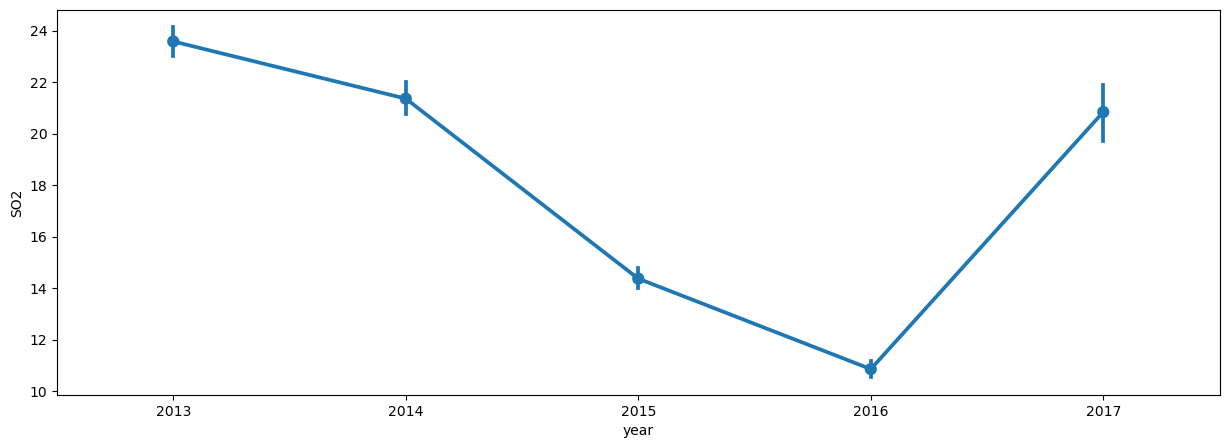

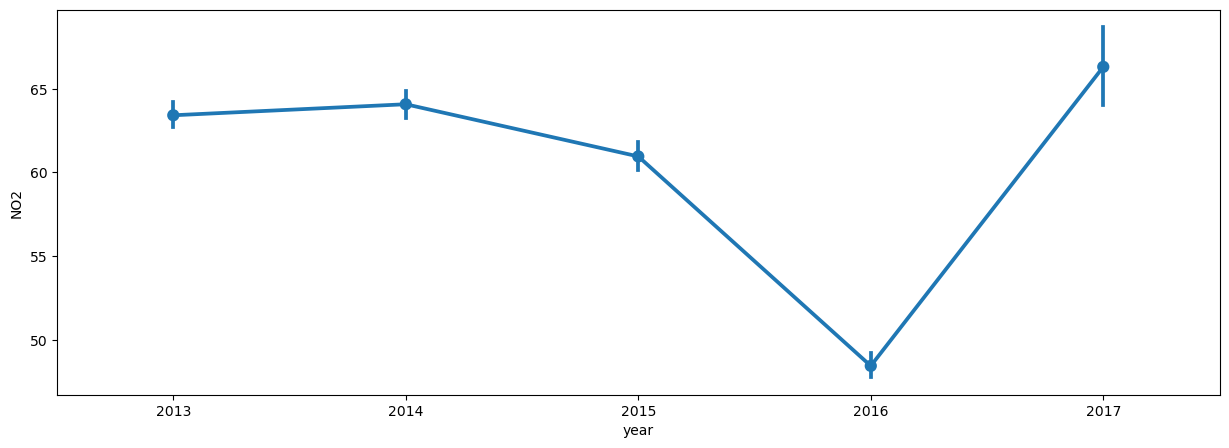

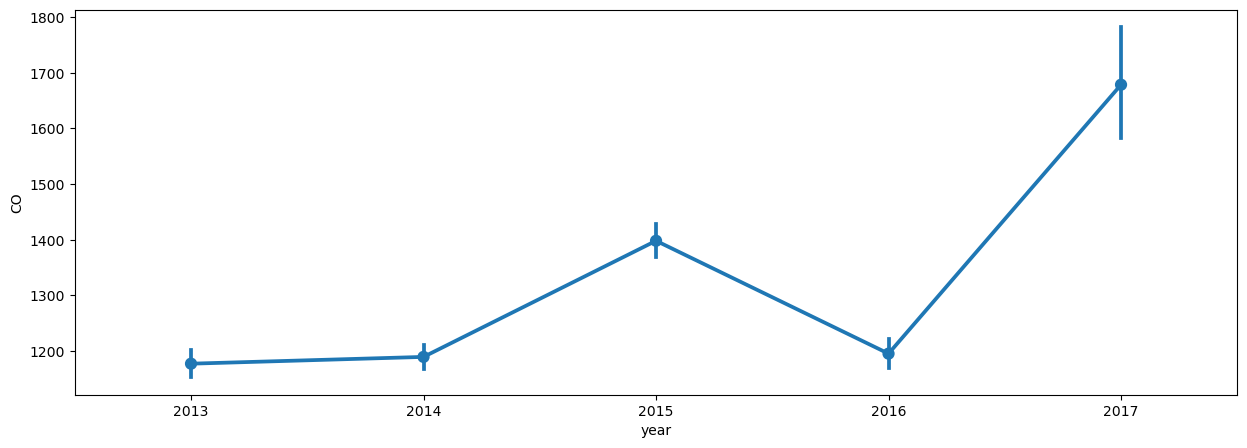

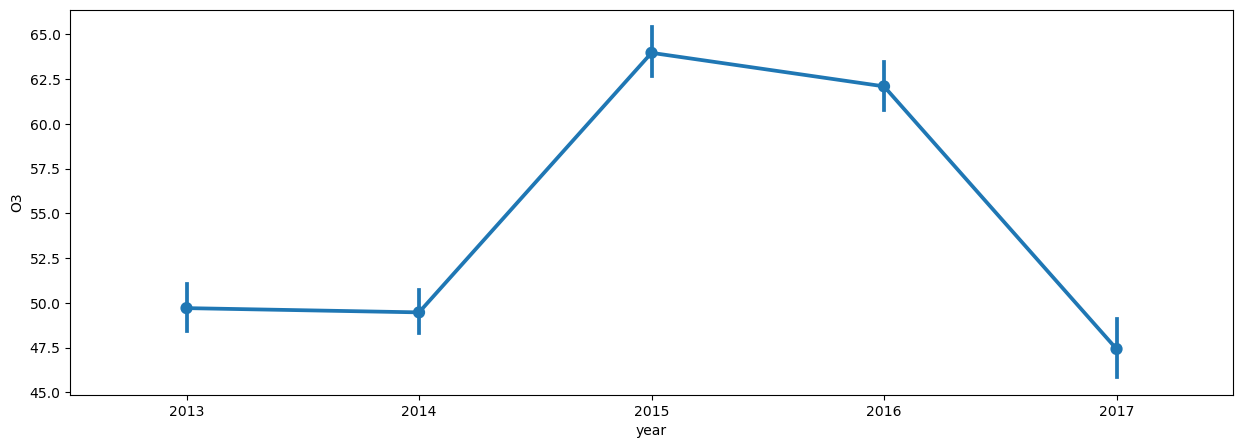

In [29]:
compounds = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
for i in compounds:    
    data = df[[i, 'year']].groupby(["year"]).mean().reset_index().sort_values(by='year', ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='year', y=i, data=df)

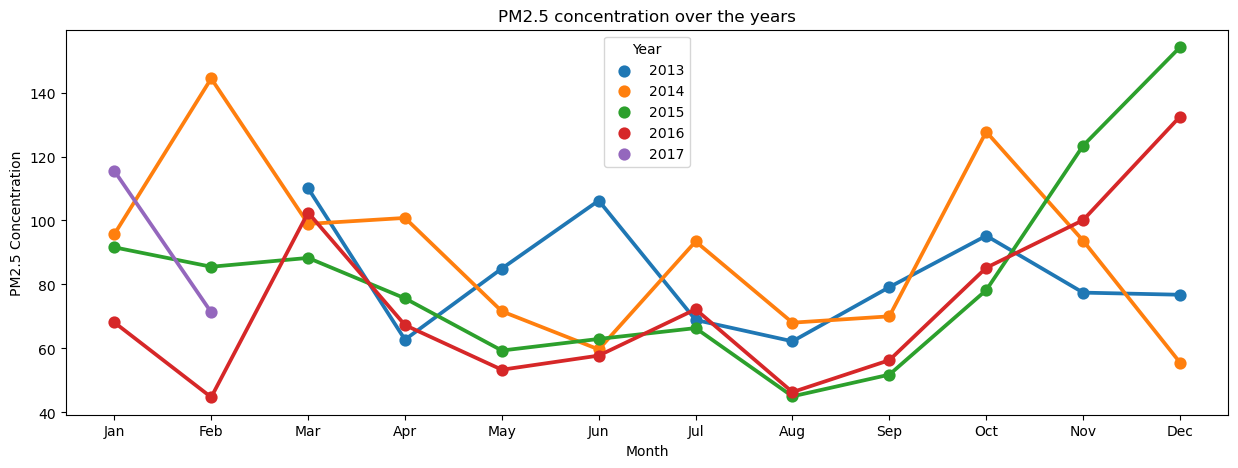

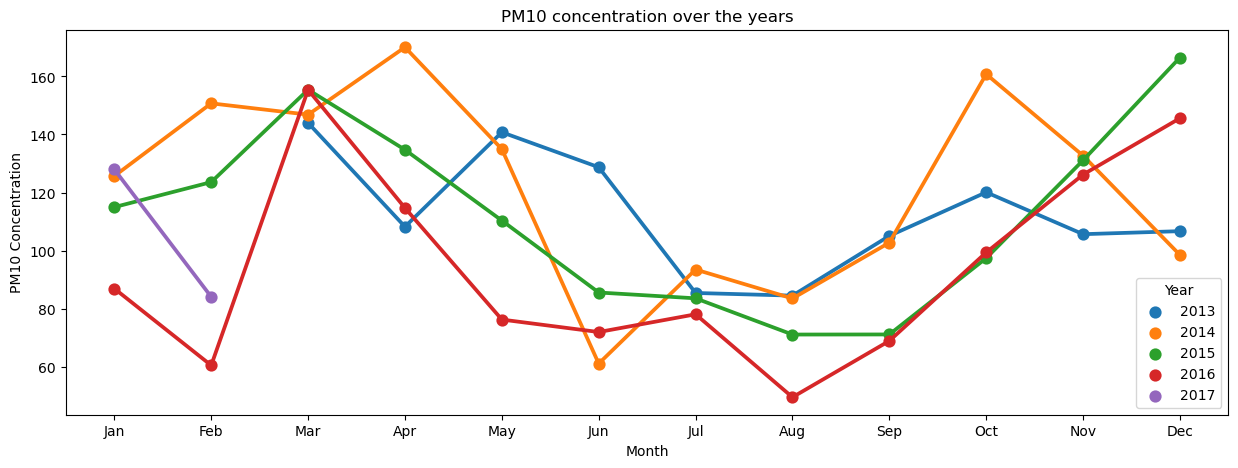

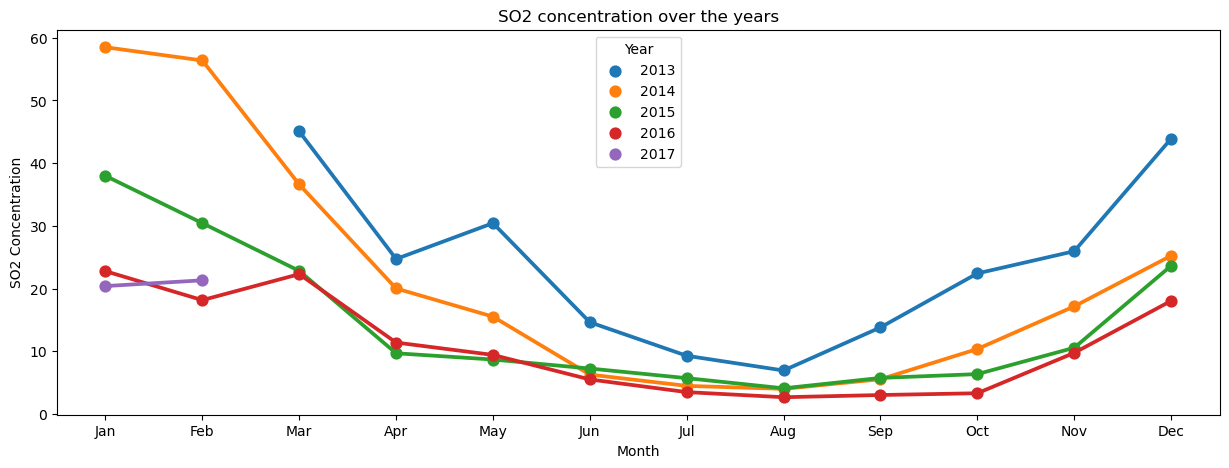

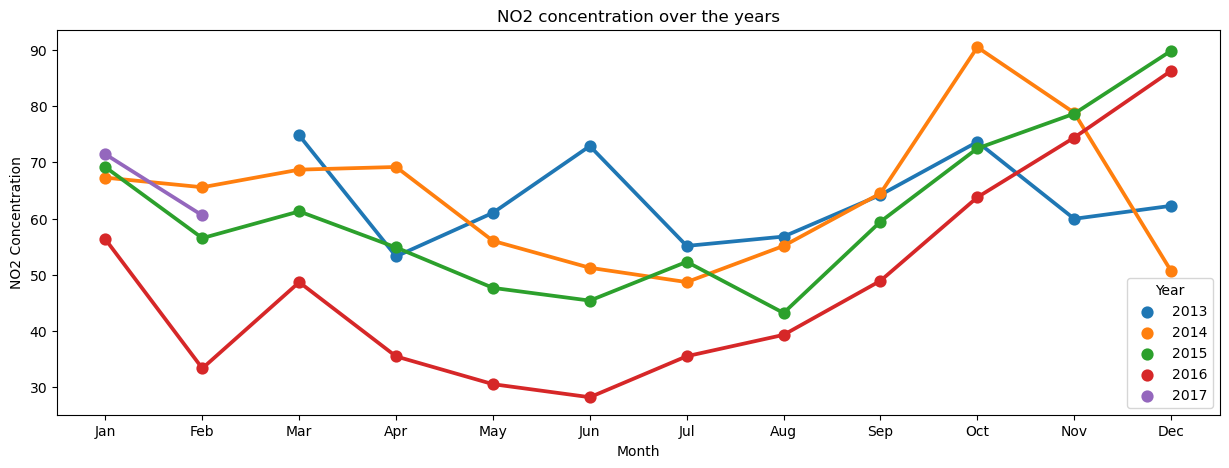

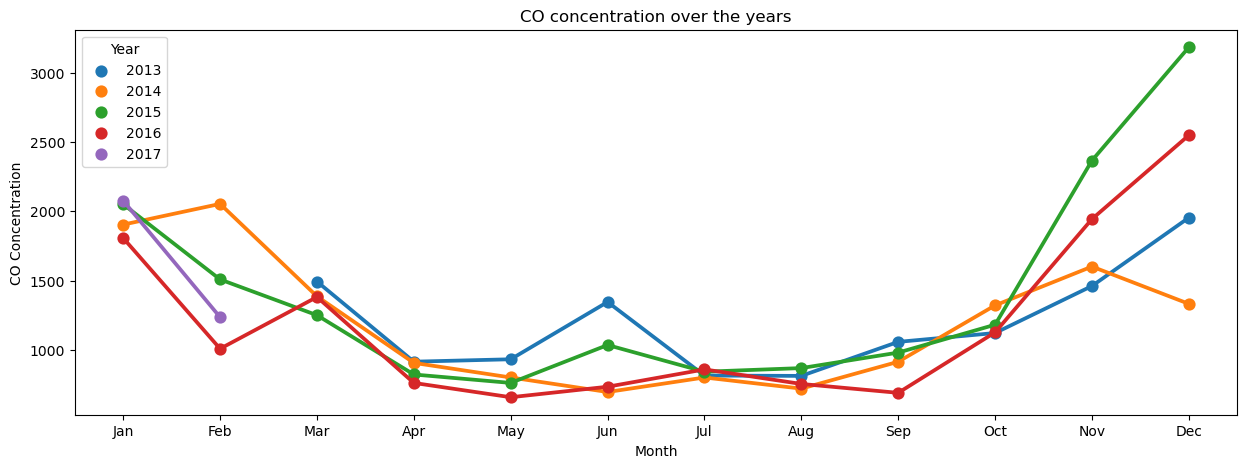

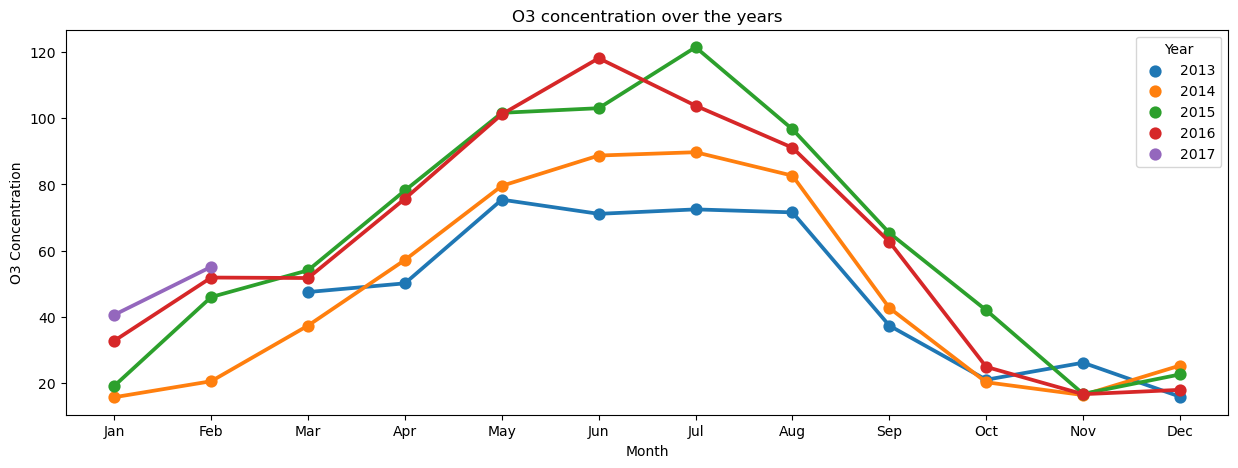

In [38]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}

# Assuming df is your DataFrame containing the data
compounds = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"] 

for compound in compounds:
    temp_data = df.copy()
    temp_data['month'] = temp_data['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], 
                                                    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                     'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    data = temp_data.groupby(["year", "month"])[[compound]].mean().reset_index().sort_values(by=['year', 'month'], ascending=True)
    data['month'] = data['month'].map(custom_dict)  # Map custom month order
    data = data.sort_values(by=['year', 'month'])  # Sort by year and custom month order
    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(x='month', y=compound, data=data, hue="year")
    plt.title(f'{compound} concentration over the years')
    plt.xlabel('Month')
    plt.ylabel(f'{compound} Concentration')
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Year')
    plt.show()

Weekly Analysis

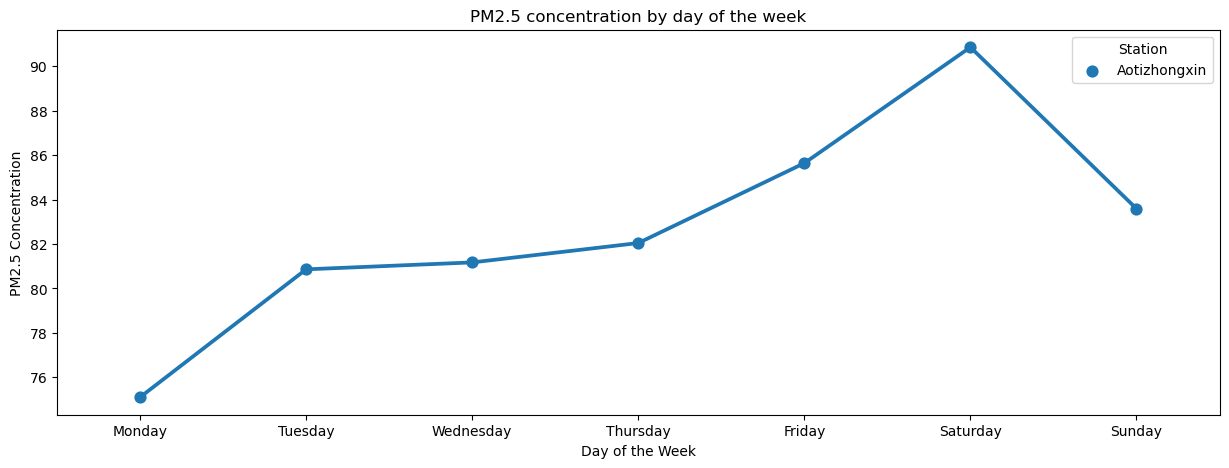

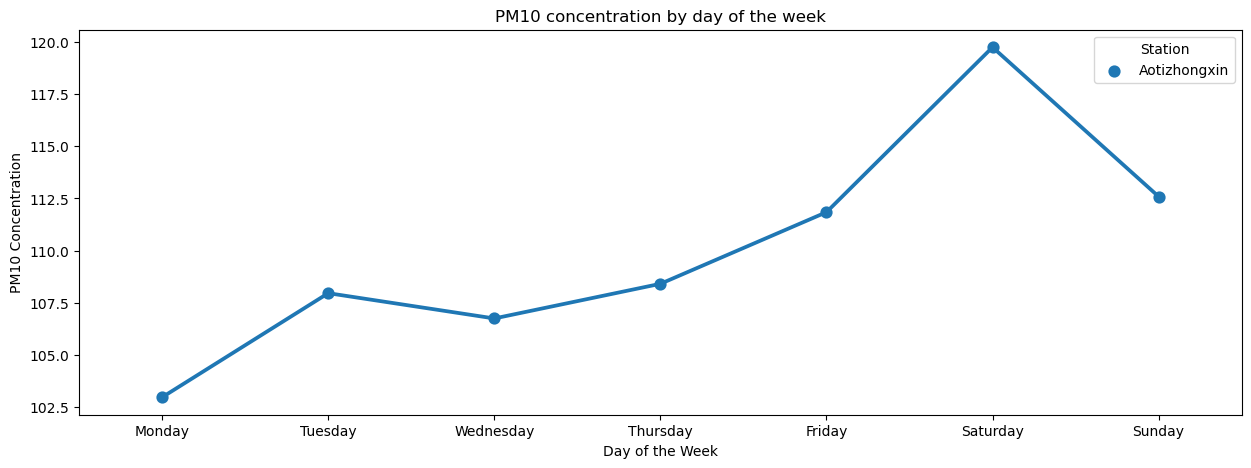

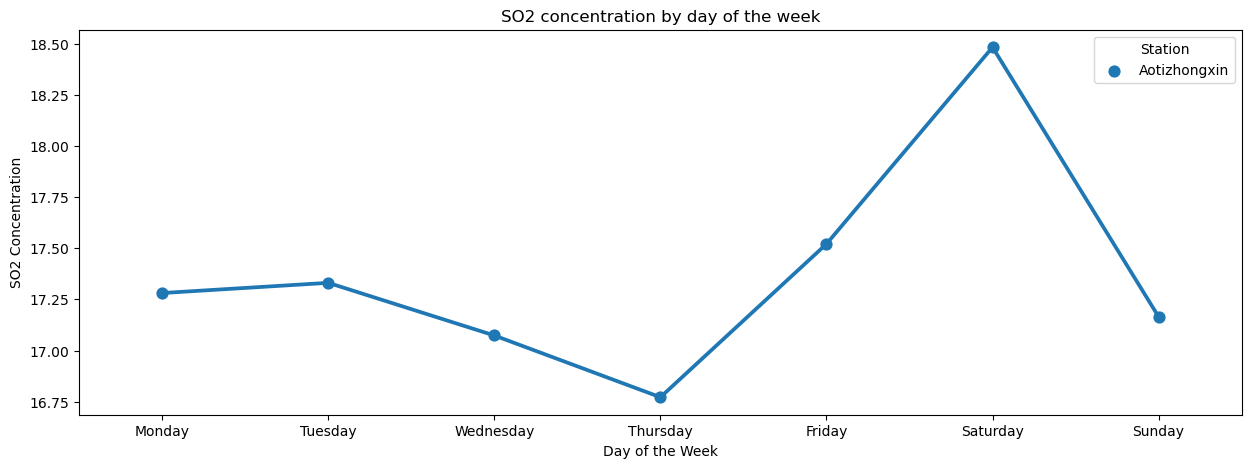

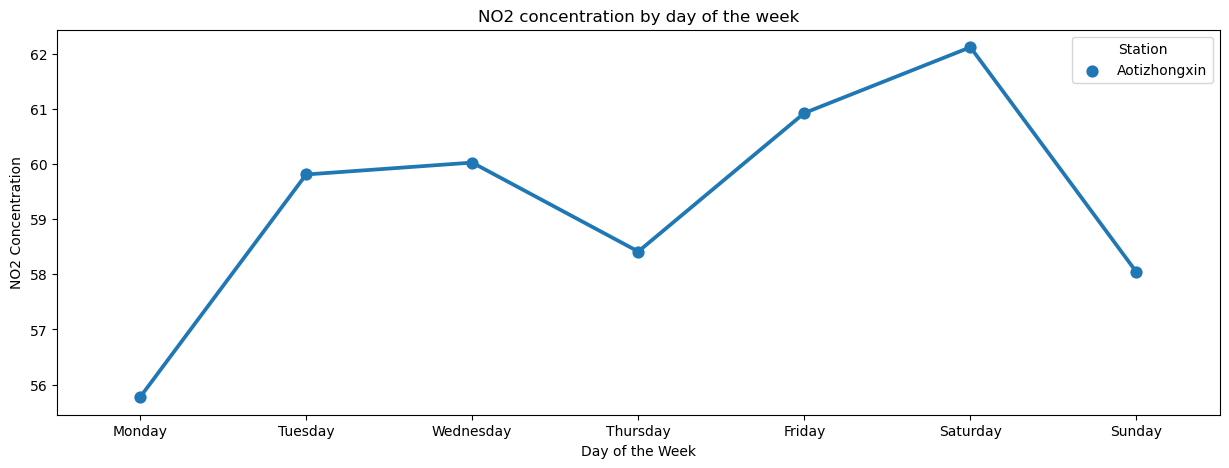

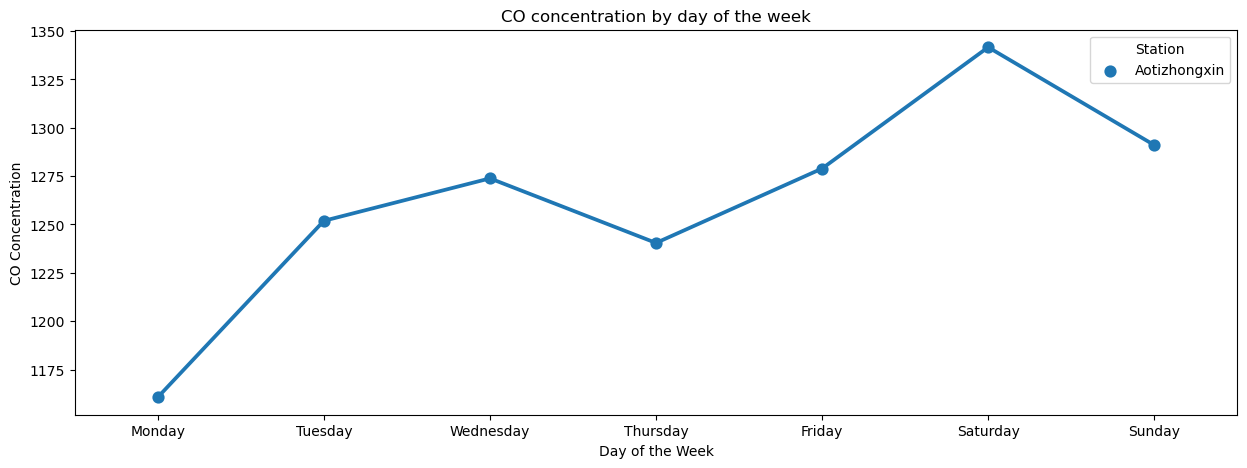

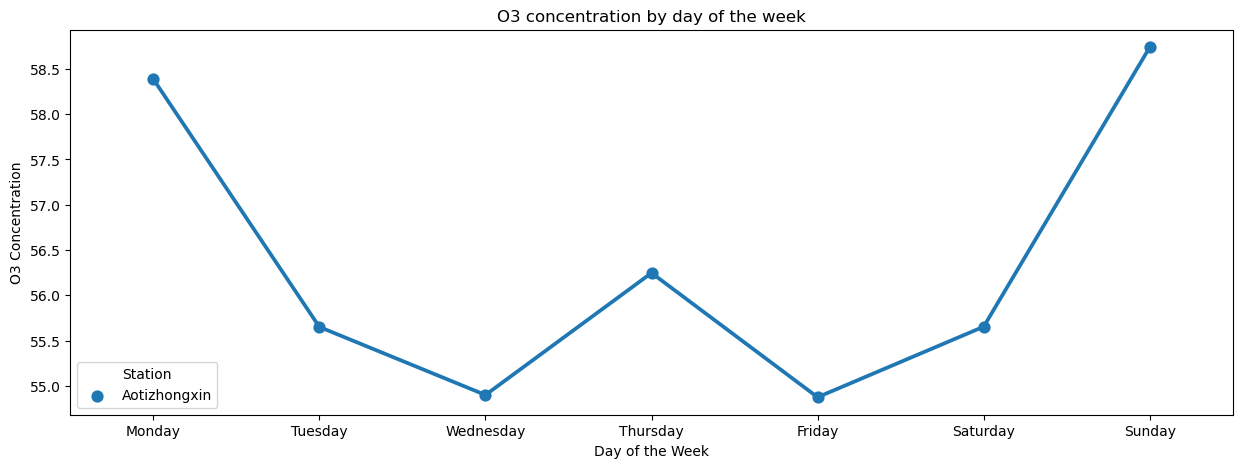

In [45]:

# Custom day order
custom_day = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}

# Assuming data is your DataFrame containing the relevant columns
compounds = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"] 

for compound in compounds:
    df_compound = df[[compound, 'DayNames', 'station']].groupby(["DayNames", "station"]).mean().reset_index().sort_values(by=['DayNames'], ascending=True)
    df_compound['DayNames'] = df_compound['DayNames'].map(custom_day)  # Map custom day order
    df_compound = df_compound.sort_values(by=['DayNames'])  # Sort by custom day order
    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(x='DayNames', y=compound, data=df_compound, hue="station")
    plt.title(f'{compound} concentration by day of the week')
    plt.xlabel('Day of the Week')
    plt.ylabel(f'{compound} Concentration')
    plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.legend(title='Station')
    plt.show()

PreProcessing

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   year      35064 non-null  int64         
 2   month     35064 non-null  int64         
 3   day       35064 non-null  int64         
 4   hour      35064 non-null  int64         
 5   PM2.5     34139 non-null  float64       
 6   PM10      34346 non-null  float64       
 7   SO2       34129 non-null  float64       
 8   NO2       34041 non-null  float64       
 9   CO        33288 non-null  float64       
 10  O3        33345 non-null  float64       
 11  TEMP      35044 non-null  float64       
 12  PRES      35044 non-null  float64       
 13  DEWP      35044 non-null  float64       
 14  RAIN      35044 non-null  float64       
 15  wd        34983 non-null  object        
 16  WSPM      35050 non-null  float64       
 17  station   35

In [49]:
df.drop(["DayNames", "Date", "PM10", "year", "month", "day", "hour"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   PM2.5    34139 non-null  float64
 2   SO2      34129 non-null  float64
 3   NO2      34041 non-null  float64
 4   CO       33288 non-null  float64
 5   O3       33345 non-null  float64
 6   TEMP     35044 non-null  float64
 7   PRES     35044 non-null  float64
 8   DEWP     35044 non-null  float64
 9   RAIN     35044 non-null  float64
 10  wd       34983 non-null  object 
 11  WSPM     35050 non-null  float64
 12  station  35064 non-null  object 
dtypes: float64(10), int64(1), object(2)
memory usage: 3.5+ MB


In [50]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn